In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
class Belief():
    def __init__(self,n=100,sigma=1,eta=2,num_representation_draws=100):
        self.X = []
        self.y = []
        self.n = n
        self.sigma = sigma
        self.eta = eta
        self.num_representation_draws = num_representation_draws
    
    def filt(self,x,y):
        self.X.append(x)
        self.y.append(y)
    
    def sample(self):
        tau = np.random.exponential(2/self.eta,size=self.n)
        X = np.asarray(self.X)
        y = np.asarray(self.y).flatten()
        if len(self.X) == 0:
            return( np.random.multivariate_normal(np.zeros(self.n),np.diag(tau)) )
        Sig = np.linalg.inv( np.linalg.inv(np.diag(tau)) + (1/(self.sigma)**2) * X.T @ X )
        mu = (1/(self.sigma)**2) * Sig @ X.T @ y
        return( np.random.multivariate_normal(mu,Sig) )
    
    def representation(self):
        samples = []
        for i in range(self.num_representation_draws):
            samples.append(self.sample())
        # representation is estimate of the mean and diagonlized covariance of the posterior
        return np.mean(samples,axis=0) , np.diag(np.cov(np.asarray(samples).T))

In [8]:
# Initialise belief
n = 30
sigma = 1
b = Belief(n,sigma=sigma)

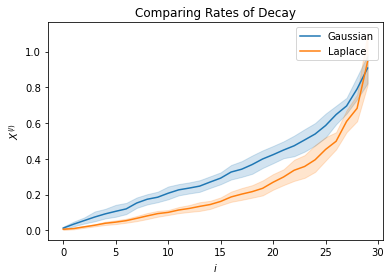

In [102]:
# Plot to check that decays faster than regular Gaussian samples
NUM_DRAWS = 10

y = []
for i in range(NUM_DRAWS):
    y.append(np.sort(np.abs(np.random.multivariate_normal(np.zeros(n),np.eye(n)))))
max_y = np.percentile(np.asarray(y).flatten(),99)
sns.lineplot(x=list(range(n))*NUM_DRAWS,y=np.asarray(y).flatten()/max_y,label='Gaussian')

y = []
for i in range(NUM_DRAWS):
    y.append(np.sort(np.abs(b.sample())))
max_y = np.percentile(np.asarray(y).flatten(),99)
sns.lineplot(x=list(range(n))*NUM_DRAWS,y=np.asarray(y).flatten()/max_y,label='Laplace')
plt.title('Comparing Rates of Decay')
plt.xlabel(r'$i$')
plt.ylabel(r'$X^{(i)}$')
plt.savefig('decay_rates.pdf')

Prior reward:  -1.0599871877368217


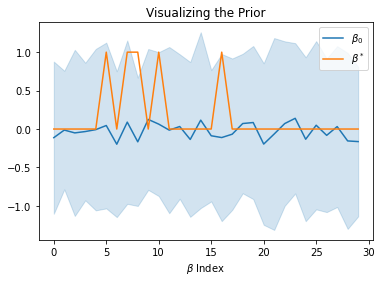

In [9]:
# Draw ground truth from prior
k = 5
beta = np.zeros(n)
ones = np.ones(k)
beta[0:k] = ones
np.random.shuffle(beta)

# beta = b.sample()
NUM_DRAWS = 500

# Plot prior representation
mu, Sig = b.representation()
sns.lineplot(x=list(range(n))*NUM_DRAWS,y=np.random.multivariate_normal(mu,np.diag(Sig),NUM_DRAWS).flatten(),ci='sd',label=r'$\beta_0$')

# Plot ground truth
plt.plot(beta,label=r'$\beta^*$')
plt.legend()
plt.xlabel(r'$\beta$ Index')
plt.title('Visualizing the Prior')

rew = 0
for i in range(NUM_DRAWS):
    rew -= np.sqrt( np.mean( (b.sample() - beta)**2 ) )
rew /= NUM_DRAWS
print('Prior reward: ', rew)
plt.savefig('prior_vis.pdf')

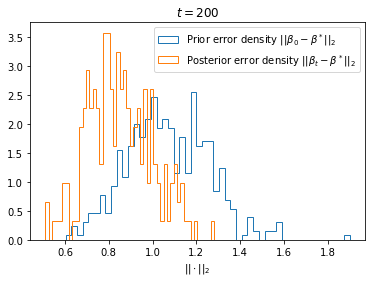

In [10]:
# Plot prior performance
y = []
for i in range(NUM_DRAWS):
    y.append(np.sqrt(np.mean((b.sample() - beta )**2)))
plt.hist(y,label=r'Prior error density $|| \beta_0 - \beta^*||_2$',histtype='step',bins=50,density=True)

# Make some observation
NUM_OBSERVATIONS = 200
for i in range(NUM_OBSERVATIONS):
    interval_start = np.random.randint(n)
    interval_length = np.random.randint(n-interval_start)
    x = np.zeros(n)
    interval = np.ones(interval_length) / interval_length
    x[interval_start:interval_start+interval_length] = interval
    
    y = beta @ x + np.random.normal()*sigma
    b.filt(x,y)

# Plot posterior performance
NUM_DRAWS = 200
y = []
for i in range(NUM_DRAWS):
    y.append(np.sqrt(np.mean((b.sample() - beta )**2)))
plt.hist(y,label=r'Posterior error density $|| \beta_t - \beta^*||_2$',histtype='step',bins=50,density=True)

plt.title('')
plt.legend()
plt.title(r'$t=$'+str(NUM_OBSERVATIONS))
plt.xlabel(r'$|| \cdot ||_2$')
plt.savefig('norm_prior_post.pdf')

Posterior reward:  -0.8389971106429114


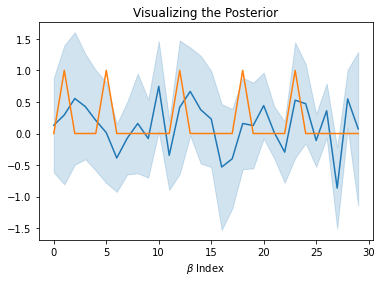

In [119]:
# Plot posterior representation
mu, Sig = b.representation()
sns.lineplot(x=list(range(n))*NUM_DRAWS,y=np.random.multivariate_normal(mu,np.diag(Sig),NUM_DRAWS).flatten(),ci='sd')
plt.plot(beta)
plt.xlabel(r'$\beta$ Index')
plt.title('Visualizing the Posterior')

rew = 0
for i in range(NUM_DRAWS):
    rew -= np.sqrt( np.mean( (b.sample() - beta)**2 ) )
rew /= NUM_DRAWS
print('Posterior reward: ', rew)
plt.savefig('post_vis.pdf')

Still crap after 200 observations iid uniform

Posterior reward:  -0.532421873684439


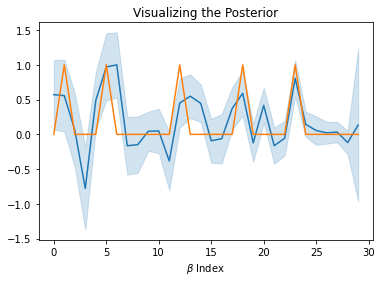

In [123]:
# Plot posterior representation
mu, Sig = b.representation()
sns.lineplot(x=list(range(n))*NUM_DRAWS,y=np.random.multivariate_normal(mu,np.diag(Sig),NUM_DRAWS).flatten(),ci='sd')
plt.plot(beta)
plt.xlabel(r'$\beta$ Index')
plt.title('Visualizing the Posterior')

rew = 0
for i in range(NUM_DRAWS):
    rew -= np.sqrt( np.mean( (b.sample() - beta)**2 ) )
rew /= NUM_DRAWS
print('Posterior reward: ', rew)
plt.savefig('post_vis.pdf')

Better after 2000 observations iid uniform

Posterior reward:  -0.21054119128268223


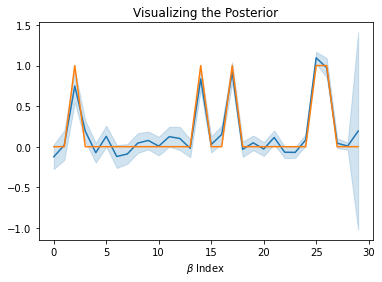

In [127]:
# Plot posterior representation
mu, Sig = b.representation()
sns.lineplot(x=list(range(n))*NUM_DRAWS,y=np.random.multivariate_normal(mu,np.diag(Sig),NUM_DRAWS).flatten(),ci='sd')
plt.plot(beta)
plt.xlabel(r'$\beta$ Index')
plt.title('Visualizing the Posterior')

rew = 0
for i in range(NUM_DRAWS):
    rew -= np.sqrt( np.mean( (b.sample() - beta)**2 ) )
rew /= NUM_DRAWS
print('Posterior reward: ', rew)
plt.savefig('post_vis.pdf')

Much better after 20000 observations iid uniform